# Importando nossa base de dados

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('tips_atualizado.csv')
df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Análise 1 - O valor da conta e gorjeta

Vamos análisar a grosso modo se existe alguma relação entre o valor da conta com o valor da gorjeta

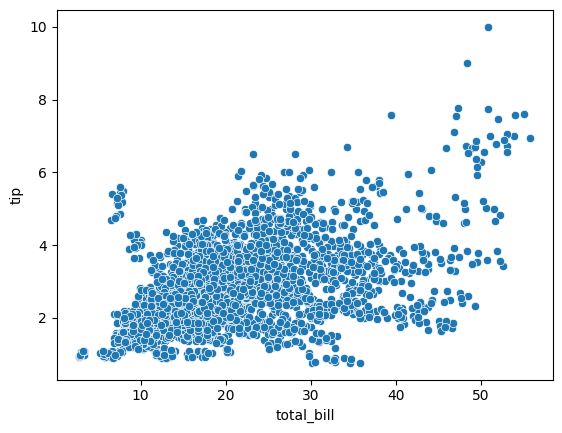

In [3]:
valor_gorjeta = sns.scatterplot(x='total_bill', y='tip', data=df)

Visualmente, o valor da gorjeta aumenta conforme o valor da conta.

### Criando o campo da porcentagem de gorjetas:

In [4]:
df['porcentagem'] = df['tip']/df['total_bill']
df.head()

,total_bill,tip,dessert,day,time,size,porcentagem
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [5]:
df.porcentagem = df.porcentagem.round(2)

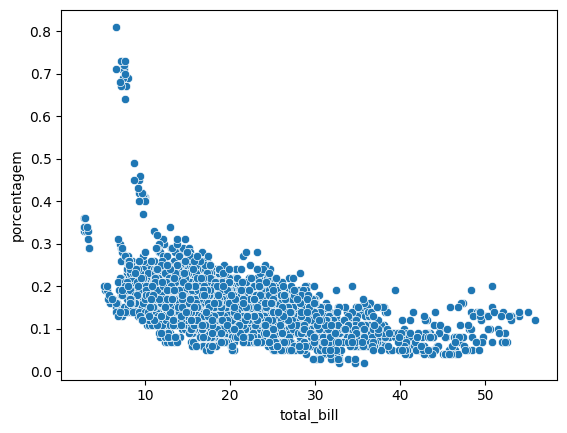

In [11]:
porcentagem_conta = sns.scatterplot(x = 'total_bill', y = 'porcentagem', data = df)

Visualmente, o valor da conta não é proporcional ao valor da gorjeta.

## Análise 2 - Sobremesa: Pedir sobremesa interfere no valor da gorjeta?

In [12]:
df[df.dessert == 'Yes'].describe()

,total_bill,tip,size,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [13]:
df[df.dessert == 'No'].describe()

,total_bill,tip,size,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


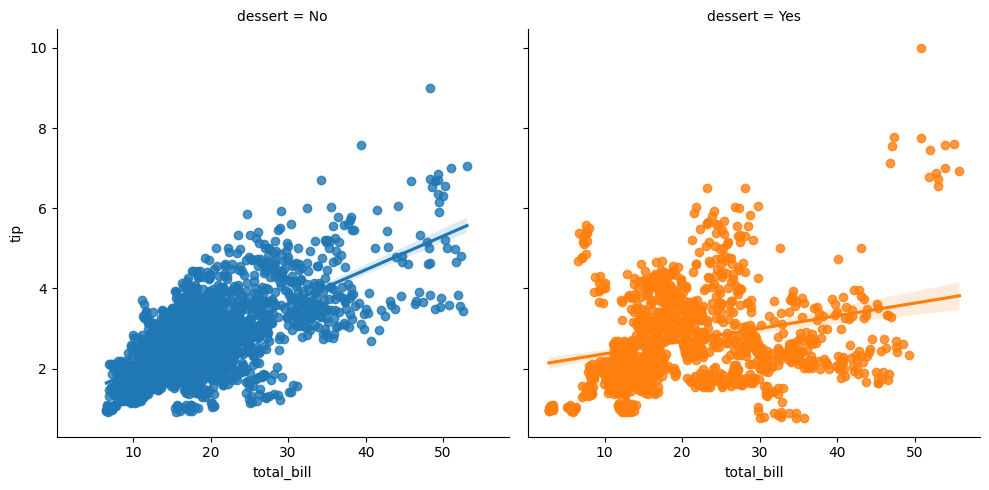

In [20]:
sns.lmplot(x='total_bill', y='tip', col='dessert', hue='dessert', data=df)

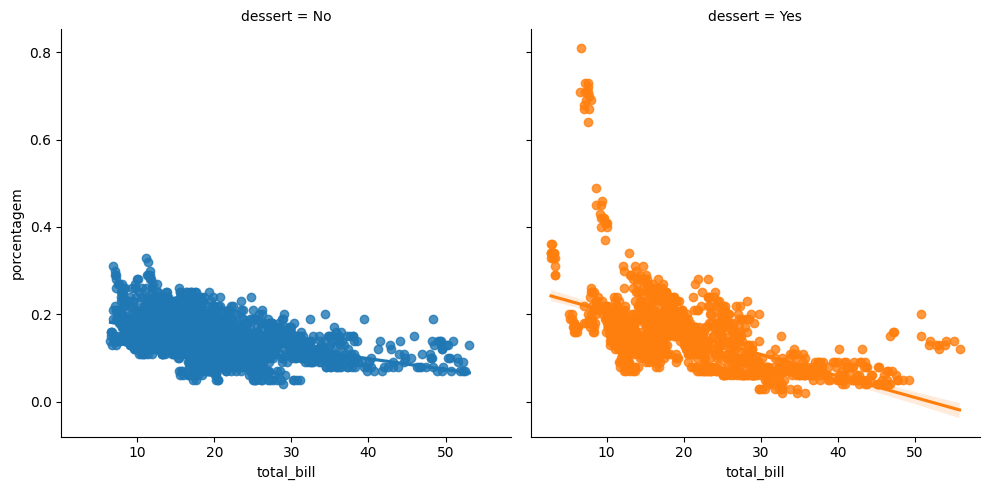

In [21]:
sns.lmplot(x='total_bill', y='porcentagem', col='dessert', hue='dessert', data=df)

Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa, mas para ter uma certeza se o grafíco condiz com a realidade, vamos realizar um teste de hipotese.

### Teste de Hipotese

H<sup>null</sup> → A distribuição da taxa da gorjeta é a mesma nos dois grupos

H<sup>alt</sup> → A distribuição da taxa da gorjeta não é a mesma nos dois grupos

In [22]:
from scipy.stats import ranksums

In [23]:
com_sobremesa = df.query("dessert == 'Yes'").porcentagem

In [24]:
sem_sobremesa = df.query("dessert == 'No'").porcentagem

In [25]:
r = ranksums(com_sobremesa, sem_sobremesa)

In [26]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.033144013617673405


Como neste caso foi obtido um p-value de 0,03 que é menor que 0,05, nós aceitamos a hipotese alternativa, ou seja, a taxa de gorjeta não é a mesma nos dois grupos.

## Análise 3 - Dia da Semana: O dia da semana interfere no valor da conta? E na gorjeta?

In [27]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

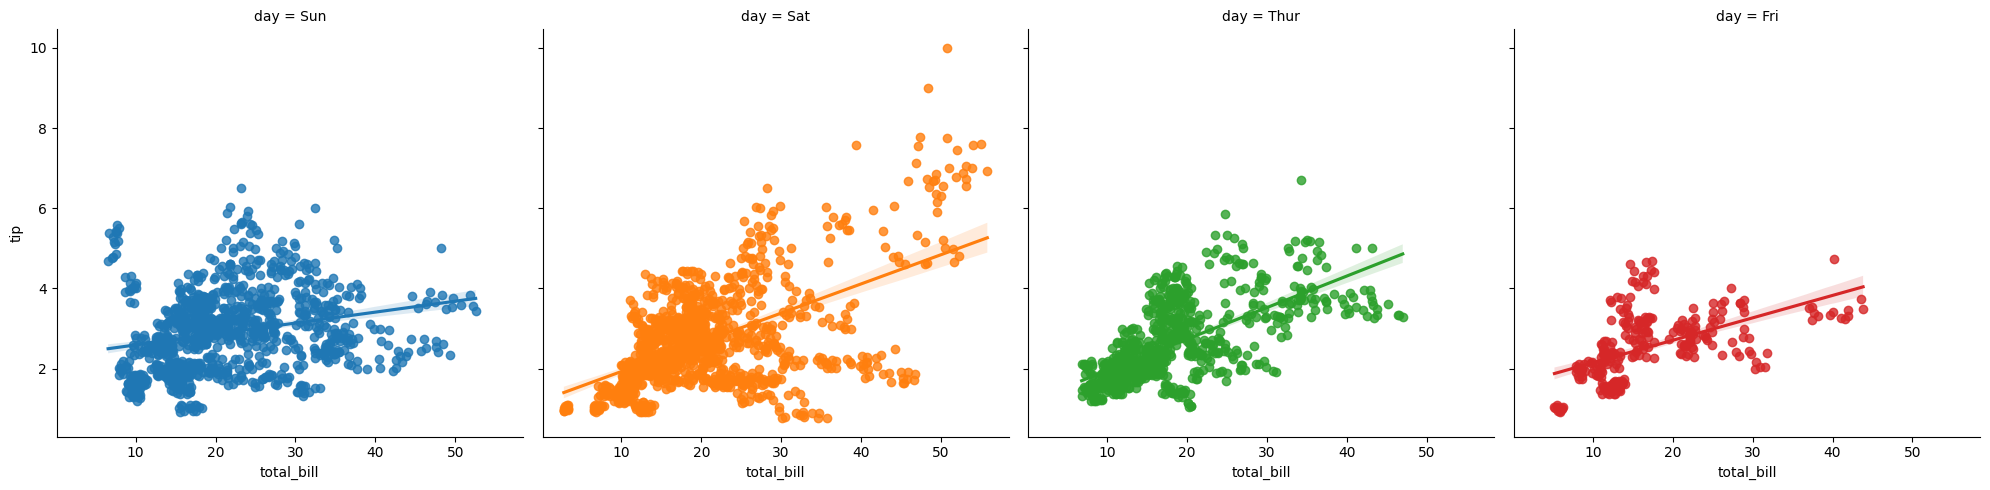

In [32]:
sns.lmplot(x='total_bill', y='tip', hue='day', col='day', data=df)

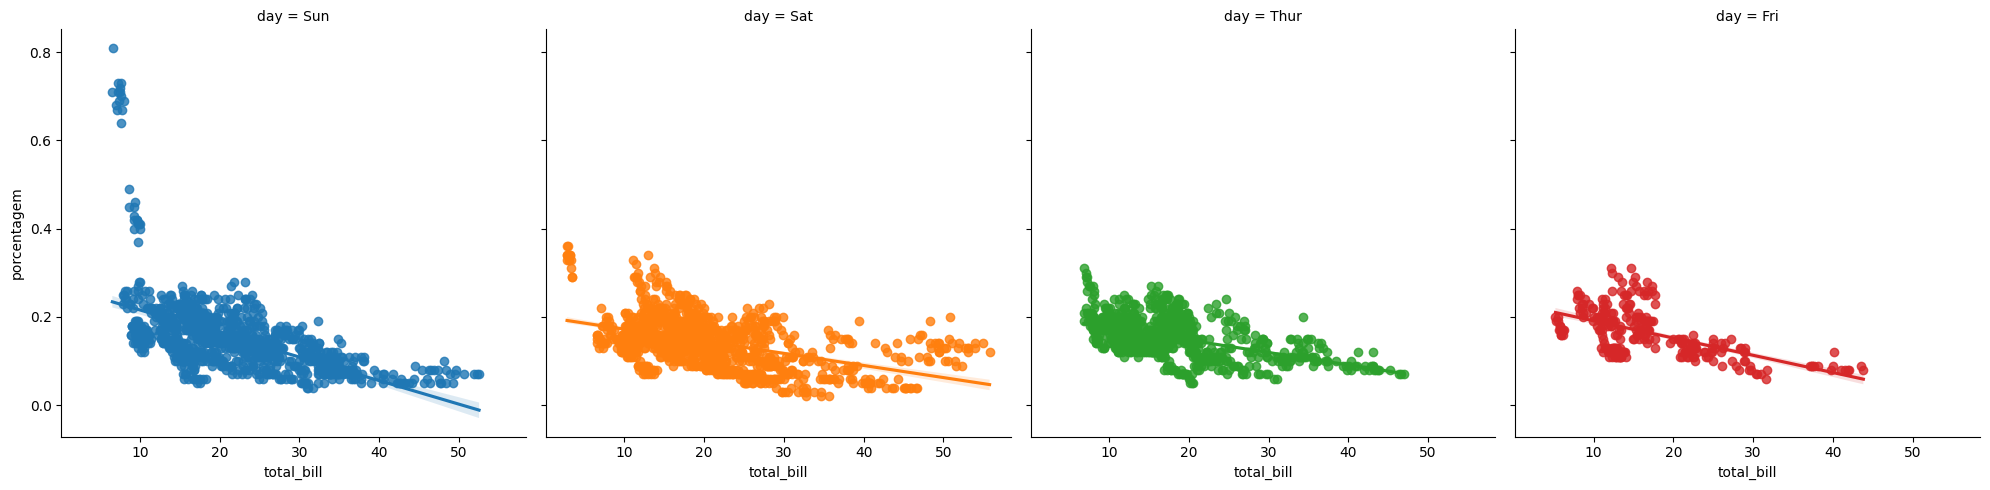

In [29]:
sns.lmplot(x='total_bill', y='porcentagem', hue='day', col='day', data=df)

In [31]:
media_geral_gorjeta = df.tip.mean().round(2)
print('A média geral das gorjetas é de {}'.format(media_geral_gorjeta))

A média geral das gorjetas é de 2.71


In [33]:
df.groupby(['day'])[['total_bill', 'tip', 'porcentagem']].mean(numeric_only=True)

,total_bill,tip,porcentagem
day,,,
Fri,17.215616,2.549960,0.163158
Sat,20.480249,2.690114,0.143604
Sun,21.439133,2.902079,0.154953
Thur,17.724088,2.556177,0.154090


### Teste de Hipótese 1:

H<sup>null</sup> → A distribuição do valor da conta é igual no sabado e no domingo

H<sup>alt</sup> → A distribuição do valor da conta não é igual no sabado e no domingo

In [37]:
valor_conta_domingo = df.query("day == 'Sun'").total_bill

In [38]:
valor_conta_sabado = df.query("day == 'Sat'").total_bill

In [39]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

In [40]:
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0004435935681441821


Novamente, como nosso p-value deu 0,0004, que é menor que 0,05, nós rejeitamos a hipotese nula e ficamos com a hipotese alternativa, a qual diz que a distribuição do valor da conta **não** é igual no sabado e no domingo.

### Teste de Hipótese 2:

H<sup>null</sup> → A distribuição da taxa da gorjeta é igual no sabado e no domingo

H<sup>alt</sup> → A distribuição da taxa da gorjeta não é igual no sabado e no domingo

In [42]:
gorjeta_domingo = df.query("day == 'Sun'").porcentagem

In [43]:
gorjeta_sabado = df.query("day == 'Sat'").porcentagem

In [44]:
r3 = ranksums(gorjeta_domingo, gorjeta_sabado)

In [45]:
print('O valor do p-value é {}'.format(r3.pvalue))

O valor do p-value é 0.1253428211744031


Neste caso, como nosso p-value deu 0,125, que é maior que 0,05, nós ficamos com a hipotese nula, que afirma que o valor percentual da gorjeta é igual no sabado e domingo.

## Análise 4 - Hora do Dia: A hora do dia interfere no valor da conta? E da gorjeta?

<Axes: xlabel='time', ylabel='total_bill'>

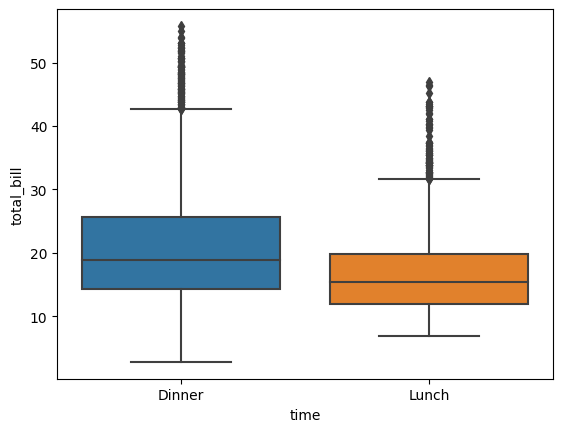

In [49]:
sns.boxplot(x='time', y='total_bill', data=df)

<Axes: xlabel='total_bill', ylabel='Count'>

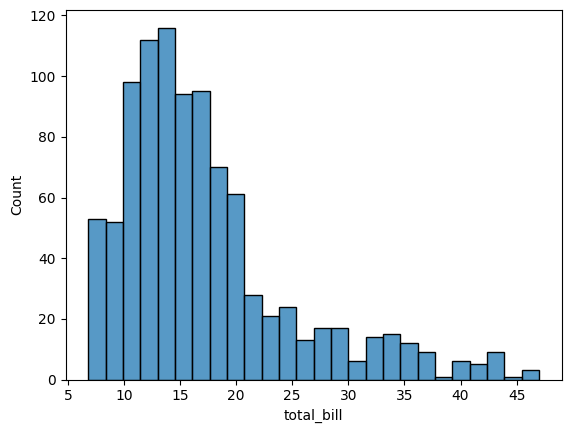

In [51]:
almoco = df.query("time == 'Lunch'").total_bill
sns.histplot(almoco)

<Axes: xlabel='total_bill', ylabel='Count'>

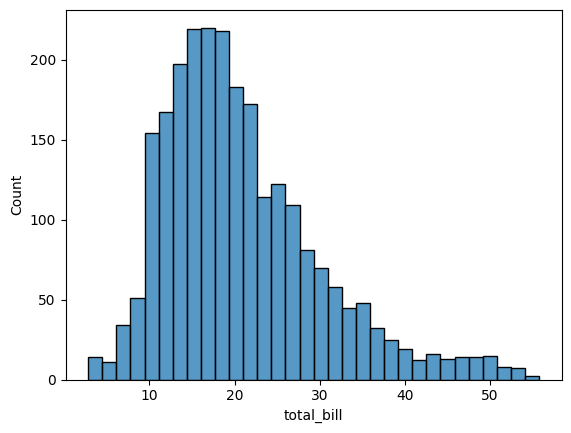

In [52]:
jantar = df.query("time == 'Dinner'").total_bill
sns.histplot(jantar)

### Teste de Hipótese 1:

H<sup>null</sup> → A distribuição do valor da conta é igual no almoço e no jantar

H<sup>alt</sup> → A distribuição do valor da conta não é igual no almoço e no jantar

In [53]:
df.groupby(['time'])[['total_bill', 'tip', 'porcentagem']].mean(numeric_only=True)

,total_bill,tip,porcentagem
time,,,
Dinner,20.832954,2.779458,0.148876
Lunch,17.213913,2.534495,0.157668


In [58]:
r4 = ranksums(almoco, jantar)

In [59]:
print('O valor do p-value é {}'.format(r4.pvalue))

O valor do p-value é 5.169201062207143e-34


Neste caso, como nosso p-value deu **muito** menor do que 0.05, vamos descartar a hipotese nula e ficar com a alternativa, que afirma que o valor da conta **não** é igual no almoço e no jantar.

### Teste de Hipótese 2:

H<sup>null</sup> → A distribuição da taxa da gorjeta é igual no almoço e no jantar

H<sup>alt</sup> → A distribuição dda taxa da gorjeta não é igual no almoço e no jantar

In [60]:
almoco_p = df.query("time == 'Lunch'").porcentagem

In [61]:
jantar_p = df.query("time == 'Dinner'").porcentagem

In [62]:
r5 = ranksums(almoco_p, jantar_p)

In [63]:
print('O valor do p-value é {}'.format(r5.pvalue))

O valor do p-value é 1.3785725618355523e-11


Novamente, como nosso p-value deu **muito** menor do que 0.05, vamos descartar a hipotese nula e ficar com a alternativa, que afirma que a taxa da gorjeta **não** é igual no almoço e no jantar.